<a href="https://colab.research.google.com/github/Brunapupo/INE6116000-Inteligencia-Artificial-Conexionista/blob/main/Ex4_seno_bruna_pupo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

import pandas as pd
import numpy as np
import math

from sklearn import preprocessing

import tensorflow as tf
from tensorflow import keras

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

import matplotlib.pyplot as plt

In [2]:
def prepare_data():
    ntot = 100
    ntrain = int(0.75*100)
    ntest = int(0.15*100)
    x = np.random.rand(ntot,1)*2*np.pi
    #x = np.linspace(0.0 , 2.0 * np.pi, ntot).reshape(-1, 1)
    s=np.random.normal(0,0.1,size = (100,1))
    print(s.shape)
    print(x.shape)
    y=np.sin(x)+s
    xtrain, xtest = x[:ntrain], x[ntest:]
    ytrain, ytest = y[:ntrain], y[ntest:]
    plt.plot(xtrain.T,ytrain.T,color = 'red', marker = "o")
    plt.title("seno")
    plt.xlabel("Angulo")
    plt.ylabel("Seno")
    plt.grid()
    plt.show()
    return xtrain, ytrain, xtest, ytest

In [3]:
def fit_model1(xtrain, ytrain, xtest, ytest, epochs, lr, momentum, patience):

    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
    # define model
    model = Sequential([Dense(10, activation='tanh', input_dim=1),
                        Dense(1, activation='linear')
                       ])
    # compile model
    opt = SGD(lr, momentum=momentum)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])
    model.summary()
    # fit model
    history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=epochs,  batch_size=75, verbose=0, callbacks=[early_stop])
    #history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=epochs,  batch_size=5, verbose=0)

    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('learning rate='+str(lr), pad=-80)
    return model

In [4]:
def fit_model2(xtrain, ytrain, xtest, ytest, epochs, lr, momentum, patience):

    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
    # define model
    model = Sequential([Dense(100, activation='relu', input_dim=1),
                        Dense(1, activation='linear')
                       ])
    # compile model
    opt = SGD(lr, momentum=momentum)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])
    model.summary()
    # fit model
    history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=epochs,  batch_size=5, verbose=0, callbacks=[early_stop])

    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('learning rate='+str(lr), pad=-80)
    return model

In [5]:
def fit_model3(xtrain, ytrain, xtest, ytest, epochs, lr, momentum, patience):

    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
    # define model
    #model = Sequential([Dense(10, activation='tanh', input_dim=1),
    model = Sequential([Dense(100, activation='relu', input_dim=1),
                        Dense(64, activation='relu'),
                        Dense(1)
                       ])
    # compile model
    opt = SGD(lr, momentum=momentum)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])
    model.summary()
    # fit model
    history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=epochs,  batch_size=5, verbose=0, callbacks=[early_stop])

    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('learning rate='+str(lr), pad=-80)
    return model

(100, 1)
(100, 1)


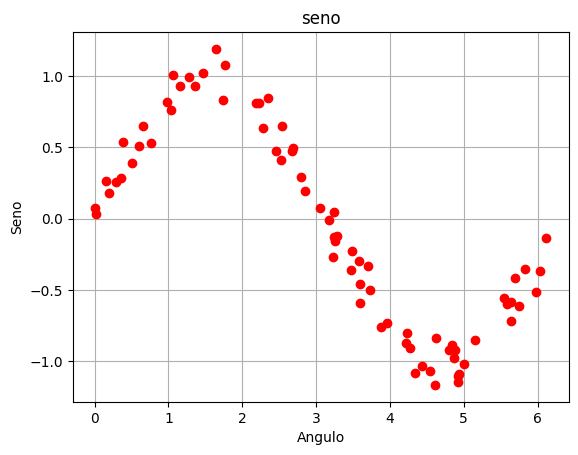

In [6]:
xtrain, ytrain, xtest, ytest = prepare_data()

scaler = preprocessing.MinMaxScaler()
# fit using the train set
scaler.fit(xtrain)
# transform the test test
xtrainN = scaler.transform(xtrain)
xtestN = scaler.transform(xtest)

X = np.linspace(0.0 , 2.0 * np.pi, 360).reshape(-1, 1)
XN = scaler.transform(X)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

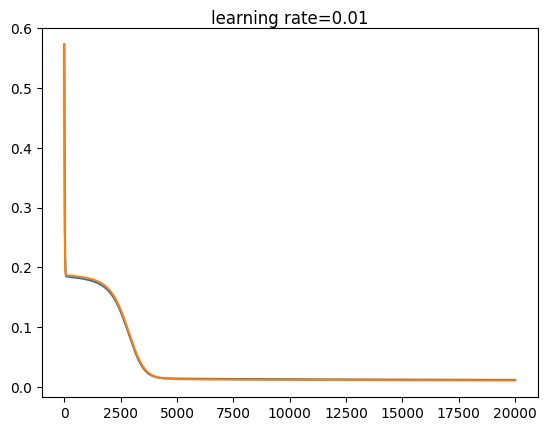

In [7]:
model1 = fit_model1(xtrainN, ytrain, xtestN, ytest, 20000, 0.01, 0.8, 100)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


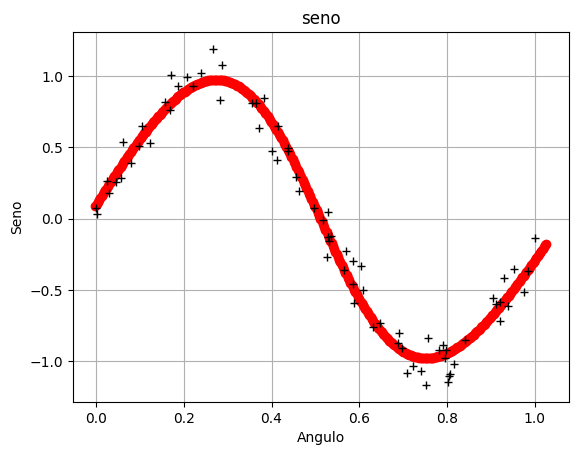

In [9]:
Y = model1.predict(XN)
plt.plot(XN,Y,color = 'red', marker = "o")
plt.plot(xtrainN.T,ytrain.T,color = 'black', marker= "+")
plt.title("seno")
plt.xlabel("Angulo")
plt.ylabel("Seno")
plt.grid()
plt.show()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

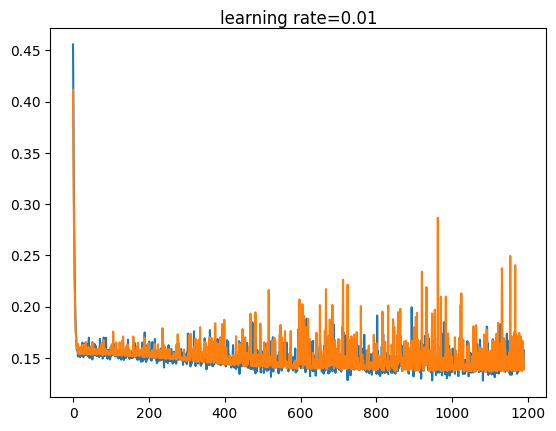

In [10]:
model2 = fit_model2(xtrainN, ytrain, xtestN, ytest, 2000, 0.01, 0.8, 100)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


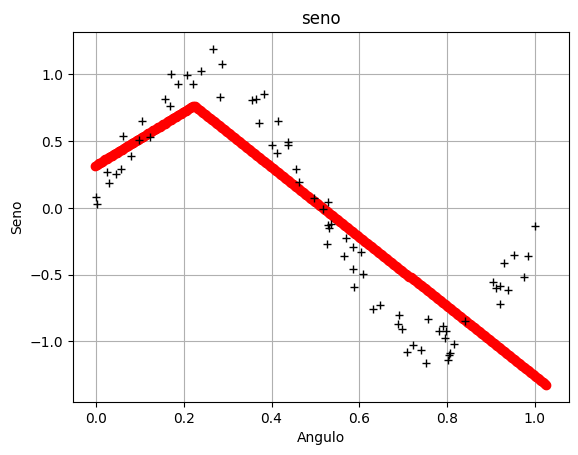

In [11]:
Y = model2.predict(XN)
plt.plot(XN,Y,color = 'red', marker = "o")
plt.plot(xtrainN.T,ytrain.T,color = 'black', marker= "+")
plt.title("seno")
plt.xlabel("Angulo")
plt.ylabel("Seno")
plt.grid()
plt.show()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,729 (26.29 KB)

 Trainable params: 6,729 (26.29 KB)

 Non-trainable params: 0 (0.00 B)

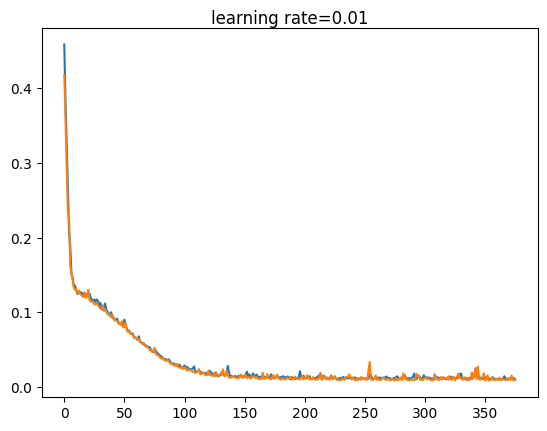

In [12]:
model3 = fit_model3(xtrainN, ytrain, xtestN, ytest, 2000, 0.01, 0.8, 100)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


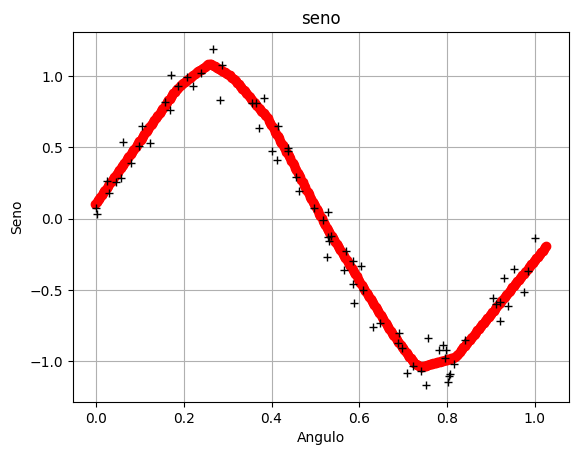

In [13]:
Y = model3.predict(XN)
plt.plot(XN,Y,color = 'red', marker = "o")
plt.plot(xtrainN.T,ytrain.T,color = 'black', marker= "+")
plt.title("seno")
plt.xlabel("Angulo")
plt.ylabel("Seno")
plt.grid()
plt.show()

In [ ]:
print(XN)


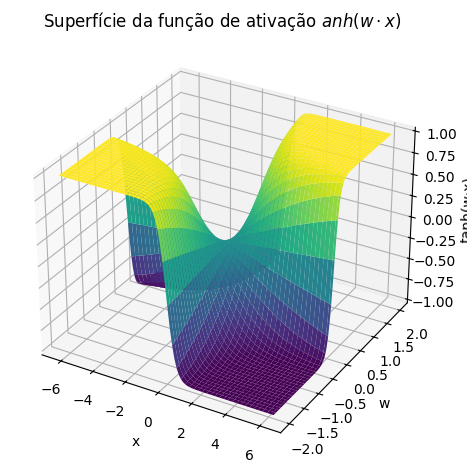

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2*np.pi, 2*np.pi, 100)
w = np.linspace(-2, 2, 100)
X, W = np.meshgrid(x, w)
Z = np.tanh(W * X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, W, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('w')
ax.set_zlabel('tanh(w·x)')
plt.title('Superfície da função de ativação $\tanh(w \cdot x)$')
plt.tight_layout()
plt.show()
